In [3]:
!pip install torch==1.11.0  torchvision

In [4]:
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-r9tp_f9q
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-r9tp_f9q
  Resolved https://github.com/facebookresearch/detectron2.git to commit 8d85329aed8506ea3672e3e208971345973ea761
  Preparing metadata (setup.py) ... done


### Installation
* Most of the libraries required for visualization like [skimage](https://scikit-image.org/docs/dev/api/skimage.html) and [matplotlib](https://matplotlib.org/) come preinstalled in kaggle environment.
* One library required to visualize COCO dataset is [Pycocotools]() which can be installed using the following command.
`pip install 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI`

In [6]:
%pip install "git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI"

  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-vus2sbl1
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-vus2sbl1
  Resolved https://github.com/cocodataset/cocoapi.git to commit 8c9bcc3cf640524c4c20a9c40e89cb6a2f2fa0e9
  Preparing metadata (setup.py) ... done


### <h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black; border:0' role="tab" aria-controls="home"><center>Import Libraries</center></h3>

In [7]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import random
pylab.rcParams['figure.figsize'] = (8.0, 10.0)# Import Libraries

# For visualization
import os
import seaborn as sns
from matplotlib import colors
from tensorboard.backend.event_processing import event_accumulator as ea
from PIL import Image

<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black; border:0' role="tab" aria-controls="home"><center>Set constant variables</center></h3>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# I am visualizing some images in the 'val/' directory

dataDir='/content/drive/MyDrive/cardamge/val'
dataType='COCO_val_annos'
mul_dataType='COCO_mul_val_annos'
annFile='{}/{}.json'.format(dataDir,dataType)
mul_annFile='{}/{}.json'.format(dataDir,mul_dataType)
img_dir = "/content/drive/MyDrive/cardamge/img"

<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black; border:0' role="tab" aria-controls="home"><center> Initialize the COCO API</center></h3>

In [10]:
# initialize coco api for instance annotations
coco=COCO(annFile)
mul_coco=COCO(mul_annFile)

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.07s)
creating index...
index created!


<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black; border:0' role="tab" aria-controls="home"><center> Display damage categories and supercategories</center></h3>

In [11]:
# display categories and supercategories

#Single Class #Damage dataset
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories for damages: \n{}\n'.format(', '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories for damages: \n{}\n'.format(', '.join(nms)))

#Multi Class #Parts dataset

mul_cats = mul_coco.loadCats(mul_coco.getCatIds())
mul_nms=[cat['name'] for cat in mul_cats]
print('COCO categories for parts: \n{}\n'.format(', '.join(mul_nms)))

mul_nms = set([mul_cat['supercategory'] for mul_cat in mul_cats])
print('COCO supercategories for parts: \n{}\n'.format(', '.join(mul_nms)))

COCO categories for damages: 
damage

COCO supercategories for damages: 
part

COCO categories for parts: 
headlamp, rear_bumper, door, hood, front_bumper

COCO supercategories for parts: 
part



In [12]:
# get all images containing 'damage' category, select one at random
catIds = coco.getCatIds(catNms=['damage']);
imgIds = coco.getImgIds(catIds=catIds );

In [13]:
random_img_id = random.choice(imgIds)
print("{} image id was selected at random from the {} list".format(random_img_id, imgIds))

6 image id was selected at random from the [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] list


In [14]:
# Load the image
imgId = coco.getImgIds(imgIds = [random_img_id])
img = coco.loadImgs(imgId)[0]
print("Image details \n",img)

Image details 
 {'coco_url': '', 'date_captured': '2020-07-14 09:59:34.190485', 'file_name': '62.jpg', 'flickr_url': '', 'height': 1024, 'id': 6, 'license': 1, 'width': 1024}


<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black; border:0' role="tab" aria-controls="home"><center> Raw Image</center></h3>

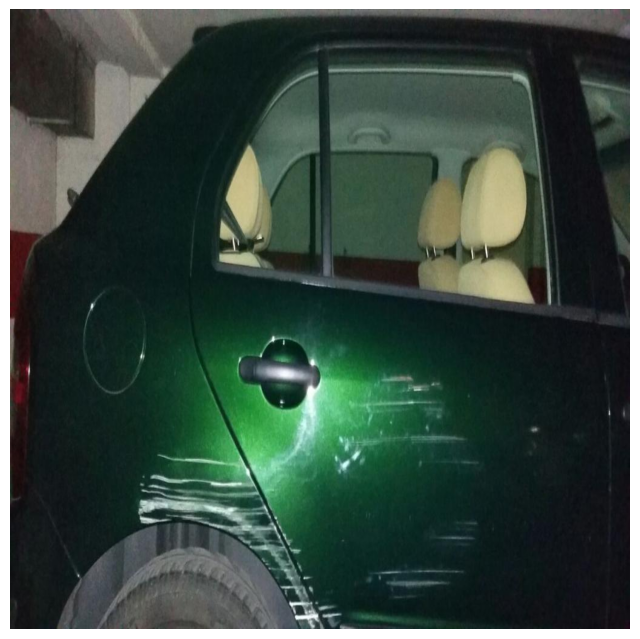

In [15]:
I = io.imread(img_dir + '/' + img['file_name'])
plt.axis('off')
plt.imshow(I)
plt.show()

<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black; border:0' role="tab" aria-controls="home"><center> Image with damage annotation</center></h3>

In [16]:
#get damage annotations
annIds = coco.getAnnIds(imgIds=imgId,iscrowd=None)
anns = coco.loadAnns(annIds)


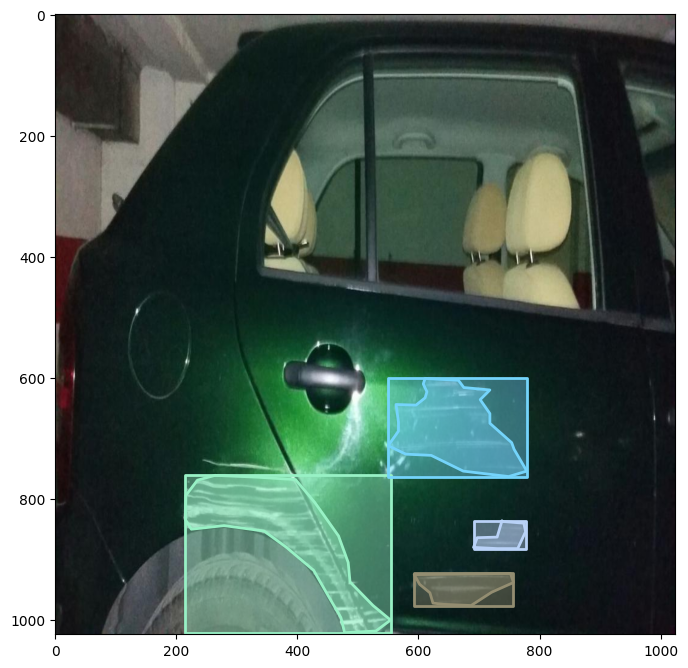

In [17]:
#Plot damages
plt.imshow(I)
plt.axis('on')
coco.showAnns(anns, draw_bbox=True )

<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black; border:0' role="tab" aria-controls="home"><center> Image with parts annotation</center></h3>

In [18]:
#get parts annotations
mul_annIds = mul_coco.getAnnIds(imgIds=imgId,iscrowd=None)
mul_anns = mul_coco.loadAnns(mul_annIds)

In [19]:
# Create a dictionary between category_id and category name
category_map = dict()

for ele in list(mul_coco.cats.values()):
    category_map.update({ele['id']:ele['name']})

In [20]:
category_map

{1: 'headlamp', 2: 'rear_bumper', 3: 'door', 4: 'hood', 5: 'front_bumper'}

Parts are: ['headlamp', 'door']


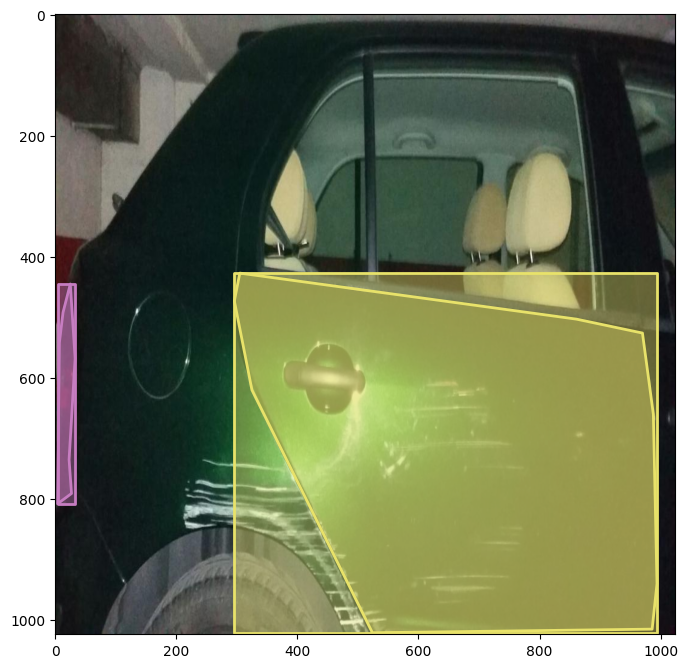

In [21]:
#Create a list of parts in the image
parts = []
for region in mul_anns:
    parts.append(category_map[region['category_id']])

print("Parts are:", parts)

#Plot Parts
I = io.imread(img_dir + '/' + img['file_name'])
plt.imshow(I)
plt.axis('on')
mul_coco.showAnns(mul_anns, draw_bbox=True )

<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black;' role="tab" aria-controls="home"><center> Training Object detection model using Detectron 2</center></h2>

<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black;' role="tab" aria-controls="home"><center> Installation </center></h3>

<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black;' role="tab" aria-controls="home"><center> Import Libraries required for training</center></h3>

In [22]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

1.11.0+cu102 True


In [23]:
assert torch.__version__.startswith("1.11.0")

In [24]:
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-v_sxohb6
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-v_sxohb6
  Resolved https://github.com/facebookresearch/detectron2.git to commit 8d85329aed8506ea3672e3e208971345973ea761
  Preparing metadata (setup.py) ... done
  Using cached pycocotools-2.0.8-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.1 kB)
Using cached pycocotools-2.0.8-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (427 kB)
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0
    Uninstalling pycocotools-2.0:
      Successfully uninstalled pycocotools-2.0


In [25]:
# To find out inconsistent CUDA versions, if there is not "failed" word in this output then things are fine.
!python -m detectron2.utils.collect_env

-------------------------------  ---------------------------------------------------------------------------------------------------------------------------------------------------
sys.platform                     linux
Python                           3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]
numpy                            1.26.4
detectron2                       0.6 @/usr/local/lib/python3.10/dist-packages/detectron2
detectron2._C                    not built correctly: /usr/local/lib/python3.10/dist-packages/detectron2/_C.cpython-310-x86_64-linux-gnu.so: undefined symbol: _ZNK3c105Error4whatEv
Compiler ($CXX)                  c++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
CUDA compiler                    Build cuda_12.2.r12.2/compiler.33191640_0
detectron2 arch flags            7.5
DETECTRON2_ENV_MODULE            <not set>
PyTorch                          1.11.0+cu102 @/usr/local/lib/python3.10/dist-packages/torch
PyTorch debug build              False
torch._C._GLIBCXX_USE_CX

In [26]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
import matplotlib.pyplot as plt
import skimage.io as io

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.engine import DefaultTrainer
from detectron2.utils.visualizer import ColorMode
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

# Set base params
plt.rcParams["figure.figsize"] = [16,9]

<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black;' role="tab" aria-controls="home"><center>  Register Car Damage Dataset </center></h3>

In [32]:

dataset_dir = "/content/drive/MyDrive/cardamge"
img_dir = "img/"
train_dir = "train/"
val_dir = "val/"

If you want to use a custom dataset while also reusing detectron2’s data loaders, you will need to

*  Register your dataset (i.e., tell detectron2 how to obtain your dataset).

* Optionally, register metadata for your dataset.

In [33]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("car_dataset_train", {}, os.path.join(dataset_dir,train_dir,"COCO_train_annos.json"), os.path.join(dataset_dir,img_dir))
register_coco_instances("car_dataset_val", {}, os.path.join(dataset_dir,val_dir,"COCO_val_annos.json"), os.path.join(dataset_dir,img_dir))

In [101]:
dataset_dicts = DatasetCatalog.get("car_dataset_train")
metadata_dicts = MetadataCatalog.get("car_dataset_train")

[10/17 10:57:49 d2.data.datasets.coco]: Loaded 59 images in COCO format from /content/drive/MyDrive/cardamge/train/COCO_train_annos.json


<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black;' role="tab" aria-controls="home"><center> Model Train </center></h2>

In [100]:
#Implementing my own Trainer Module here to use the COCO validation evaluation during training
# TODO: add data custom augmentation
class CocoTrainer(DefaultTrainer):

  @classmethod
  def build_evaluator(cls, cfg, dataset_name, output_folder=None):

    if output_folder is None:
        os.makedirs("coco_eval", exist_ok=True)
        output_folder = "coco_eval"

    return COCOEvaluator(dataset_name, cfg, False, output_folder)

In [102]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("car_dataset_train",)
cfg.DATASETS.TEST = ("car_dataset_val",)
cfg.DATALOADER.NUM_WORKERS = 4
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml")
 # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.001  # pick a good LR
cfg.SOLVER.WARMUP_ITERS = 700
cfg.SOLVER.MAX_ITER = 800 #adjust up if val mAP is still rising, adjust down if overfit
cfg.SOLVER.STEPS = (600,)  # Remove the milestone that is equal to MAX_ITER
cfg.SOLVER.GAMMA = 0.05
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this  dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # Change to 1 for one class (damage) with class ID 0
cfg.MODEL.RETINANET.NUM_CLASSES = 1 # Change to 1 for one class (damage) with class ID 0
cfg.TEST.EVAL_PERIOD = 600



# Clear any logs from previous runs
#TODO add timestamp to logs
!rm -rf cfg.OUTPUT_DIR


os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = CocoTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[10/17 10:58:07 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:487: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[10/17 10:58:09 d2.engine.train_loop]: Starting training from iteration 0
[10/17 10:58:50 d2.utils.events]:  eta: 0:26:46  iter: 19  total_loss: 1.418  loss_cls: 0.6794  loss_box_reg: 0.4206  loss_rpn_cls: 0.2452  loss_rpn_loc: 0.01936    time: 2.0156  last_time: 2.1447  data_time: 0.0547  last_data_time: 0.0134   lr: 2.33e-06  max_mem: 7440M
[10/17 10:59:30 d2.utils.events]:  eta: 0:25:58  iter: 39  total_loss: 1.354  loss_cls: 0.6501  loss_box_reg: 0.2961  loss_rpn_cls: 0.3511  loss_rpn_loc: 0.02313    time: 2.0127  last_time: 1.8795  data_time: 0.0253  last_data_time: 0.0150   lr: 3.73e-06  max_mem: 7440M
[10/17 11:00:14 d2.utils.events]:  eta: 0:25:23  iter: 59  total_loss: 1.288  loss_cls: 0.6038  loss_box_reg: 0.3702  loss_rpn_cls: 0.2614  loss_rpn_loc: 0.01987    time: 2.0638  last_time: 2.2938  data_time: 0.0240  last_data_time: 0.0543   lr: 5.13e-06  max_mem: 7440M
[10/17 11:00:57 d2.utils.events]:  eta: 0:25:00  iter: 79  total_loss: 1.291  loss_cls: 0.5512  loss_box_reg: 0.3

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:487: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[10/17 11:19:23 d2.evaluation.evaluator]: Inference done 11/11. Dataloading: 0.0014 s/iter. Inference: 0.1926 s/iter. Eval: 0.0006 s/iter. Total: 0.1946 s/iter. ETA=0:00:00
[10/17 11:19:24 d2.evaluation.evaluator]: Total inference time: 0:00:01.443120 (0.240520 s / iter per device, on 1 devices)
[10/17 11:19:24 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:01 (0.192552 s / iter per device, on 1 devices)
[10/17 11:19:24 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[10/17 11:19:24 d2.evaluation.coco_evaluation]: Saving results to coco_eval/coco_instances_results.json
[10/17 11:19:24 d2.evaluation.coco_evaluation]: Evaluating predictions with official COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.12s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:487: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[10/17 11:26:40 d2.evaluation.evaluator]: Inference done 11/11. Dataloading: 0.0010 s/iter. Inference: 0.1897 s/iter. Eval: 0.0004 s/iter. Total: 0.1911 s/iter. ETA=0:00:00
[10/17 11:26:40 d2.evaluation.evaluator]: Total inference time: 0:00:01.332582 (0.222097 s / iter per device, on 1 devices)
[10/17 11:26:40 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:01 (0.189714 s / iter per device, on 1 devices)
[10/17 11:26:40 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[10/17 11:26:40 d2.evaluation.coco_evaluation]: Saving results to coco_eval/coco_instances_results.json
[10/17 11:26:40 d2.evaluation.coco_evaluation]: Evaluating predictions with official COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.06s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 

In [32]:
!pip install pycocotools --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.8/427.8 kB 24.8 MB/s eta 0:00:00
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0
    Uninstalling pycocotools-2.0:
      Successfully uninstalled pycocotools-2.0


<h3 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black;' role="tab" aria-controls="home"><center>  Model Metrics and Hyper Parameters Visualization </center></h3>

In [103]:
# Look at training curves in tensorboard:
# %reload_ext tensorboard
# %tensorboard --logdir ./output

### Note: Unfortunately, there is some issue with tensorboard in Kaggle so I thought of using seaborn to visualize the plots.

Source: https://www.kaggle.com/product-feedback/89671#764494

In [104]:
def smooth(scalars, weight=0.6):
    """
    Reference: https://github.com/plotly/dash-live-model-training/blob/master/app.py#L163
    """
    last = scalars[0]
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point
        smoothed.append(smoothed_val)
        last = smoothed_val
    return smoothed


def plot(logdir: str, savedir: str, smoothing: float = 0.6, no_title=False, no_legend=False, no_axis_labels=False):
    """ re-draw the tf summary events plots  using seaborn
    :param logdir: Path to the directory having event logs
    :param savedir: Path to save the seaborn graphs
    :param smoothing: smoothing window space for the plots
    """
    assert 0 <= smoothing <= 1, 'Smoothing value should be in [0,1]'

    plots = []

    sns.set(style="darkgrid")
    sns.set_context("paper")

    # Collect data
    # we recognize all files which have tfevents
    scalars_info = {}
    for root, dirs, files in os.walk(logdir):
        for event_file in [x for x in files if 'tfevents' in x]:
            event_path = os.path.join(root, event_file)

            acc = ea.EventAccumulator(event_path)
            acc.Reload()

            # only support scalar now
            scalar_list = acc.Tags()['scalars']
            for tag in scalar_list:
                x = [s.step for s in acc.Scalars(tag)]
                y = [s.value for s in acc.Scalars(tag)]
                data = {'x': x, 'y': y, 'legend': root.split(logdir)[1][1:] if root != logdir else None}
                if tag not in scalars_info:
                    scalars_info[tag] = [data]
                else:
                    scalars_info[tag].append(data)

    # We recognize groups assuming each group name has /
    # And, each group is saved in a separate directory
    for tag, tag_data in scalars_info.items():
        _split = tag.split('/')
        if len(_split) <= 1:
            _path = os.path.join(savedir, 'seaborn')
            _name = _split[0]
        else:
            _path = os.path.join(savedir, 'seaborn', _split[0])
            _name = ''.join(_split[1:])

        os.makedirs(_path, exist_ok=True)

        color_list = list(sns.color_palette(palette='dark', n_colors=len(tag_data)))[::-1]
        for data in tag_data:
            x, y = data['x'], data['y']
            y_smooth = smooth(y, weight=smoothing)
            current_color = color_list.pop()
            _plt = sns.lineplot(x, y, color=colors.to_rgba(current_color, alpha=0.4))
            _legend = data['legend'] if not no_legend else None
            _plt = sns.lineplot(x, y_smooth, label=data['legend'], color=current_color)

        if not no_axis_labels:
            _plt.set(xlabel='x', ylabel='y')
        if not no_title:
            _plt.set_title(_name.capitalize())

        plots.append(os.path.join(_path, _name + '.png'))
        plt.savefig(os.path.join(_path, _name + '.png'))
        plt.clf()
    return plots

In [106]:
plots = plot(logdir= './output', savedir= './')

<Figure size 1600x900 with 0 Axes>

In [81]:
plots

In [105]:
def plot(logdir: str, savedir: str, smoothing: float = 0.6, no_title=False, no_legend=False, no_axis_labels=False):
    """ re-draw the tf summary events plots  using seaborn
    :param logdir: Path to the directory having event logs
    :param savedir: Path to save the seaborn graphs
    :param smoothing: smoothing window space for the plots
    """
    assert 0 <= smoothing <= 1, 'Smoothing value should be in [0,1]'

    plots = []

    import seaborn as sns # Import seaborn
    import os
    import tensorboard.backend.event_processing.event_accumulator as ea
    import matplotlib.pyplot as plt
    from matplotlib import colors

    sns.set(style="darkgrid")
    sns.set_context("paper")

    # Collect data
    # we recognize all files which have tfevents
    scalars_info = {}
    for root, dirs, files in os.walk(logdir):
        for event_file in [x for x in files if 'tfevents' in x]:
            event_path = os.path.join(root, event_file)

            acc = ea.EventAccumulator(event_path)
            acc.Reload()

            # only support scalar now
            scalar_list = acc.Tags()['scalars']
            for tag in scalar_list:
                x = [s.step for s in acc.Scalars(tag)]
                y = [s.value for s in acc.Scalars(tag)]
                data = {'x': x, 'y': y, 'legend': root.split(logdir)[1][1:] if root != logdir else None}
                if tag not in scalars_info:
                    scalars_info[tag] = [data]
                else:
                    scalars_info[tag].append(data)

    # We recognize groups assuming each group name has /
    # And, each group is saved in a separate directory
    for tag, tag_data in scalars_info.items():
        _split = tag.split('/')
        if len(_split) <= 1:
            _path = os.path.join(savedir, 'seaborn')
            _name = _split[0]
        else:
            _path = os.path.join(savedir, 'seaborn', _split[0])
            _name = ''.join(_split[1:])

        os.makedirs(_path, exist_ok=True)

        color_list = list(sns.color_palette(palette='dark', n_colors=len(tag_data)))[::-1]
        for data in tag_data:
            x, y = data['x'], data['y']
            y_smooth = smooth(y, weight=smoothing)
            current_color = color_list.pop()

            # Pass x and y as keyword arguments within the 'data' parameter
            _plt = sns.lineplot(x='x', y='y', data={'x': x, 'y': y}, color=colors.to_rgba(current_color, alpha=0.4))
            _legend = data['legend'] if not no_legend else None
            _plt = sns.lineplot(x='x', y='y', data={'x': x, 'y': y_smooth}, label=data['legend'], color=current_color)

        if not no_axis_labels:
            _plt.set(xlabel='x', ylabel='y')
        if not no_title:
            _plt.set_title(_name.capitalize())

        plots.append(os.path.join(_path, _name + '.png'))
        plt.savefig(os.path.join(_path, _name + '.png'))
        plt.clf()
    return

In [59]:
def plot(logdir: str, savedir: str, smoothing: float = 0.6, no_title=False, no_legend=False, no_axis_labels=False):
    """ re-draw the tf summary events plots  using seaborn
    :param logdir: Path to the directory having event logs
    :param savedir: Path to save the seaborn graphs
    :param smoothing: smoothing window space for the plots
    """
    assert 0 <= smoothing <= 1, 'Smoothing value should be in [0,1]'

    plots = []

    import seaborn as sns # Import seaborn
    import os
    import tensorboard.backend.event_processing.event_accumulator as ea
    import matplotlib.pyplot as plt
    from matplotlib import colors

    sns.set(style="darkgrid")
    sns.set_context("paper")

    # Collect data
    # we recognize all files which have tfevents
    scalars_info = {}
    for root, dirs, files in os.walk(logdir):
        for event_file in [x for x in files if 'tfevents' in x]:
            event_path = os.path.join(root, event_file)

            acc = ea.EventAccumulator(event_path)
            acc.Reload()

            # only support scalar now
            scalar_list = acc.Tags()['scalars']
            for tag in scalar_list:
                x = [s.step for s in acc.Scalars(tag)]
                y = [s.value for s in acc.Scalars(tag)]
                data = {'x': x, 'y': y, 'legend': root.split(logdir)[1][1:] if root != logdir else None}
                if tag not in scalars_info:
                    scalars_info[tag] = [data]
                else:
                    scalars_info[tag].append(data)

    # We recognize groups assuming each group name has /
    # And, each group is saved in a separate directory
    for tag, tag_data in scalars_info.items():
        _split = tag.split('/')
        if len(_split) <= 1:
            _path = os.path.join(savedir, 'seaborn')
            _name = _split[0]
        else:
            _path = os.path.join(savedir, 'seaborn', _split[0])
            _name = ''.join(_split[1:])

        os.makedirs(_path, exist_ok=True)

        color_list = list(sns.color_palette(palette='dark', n_colors=len(tag_data)))[::-1]
        for data in tag_data:
            x, y = data['x'], data['y']
            y_smooth = smooth(y, weight=smoothing)
            current_color = color_list.pop()

            # Pass x and y as keyword arguments within the 'data' parameter
            _plt = sns.lineplot(x='x', y='y', data={'x': x, 'y': y}, color=colors.to_rgba(current_color, alpha=0.4))
            _legend = data['legend'] if not no_legend else None
            _plt = sns.lineplot(x='x', y='y', data={'x': x, 'y': y_smooth}, label=data['legend'], color=current_color)

        if not no_axis_labels:
            _plt.set(xlabel='x', ylabel='y')
        if not no_title:
            _plt.set_title(_name.capitalize())

        plots.append(os.path.join(_path, _name + '.png'))
        plt.savefig(os.path.join(_path, _name + '.png'))
        plt.clf()
    return

In [107]:
my_dpi = 1000
fig, ax = plt.subplots(4,1, figsize = (12,10), dpi=my_dpi)


ax[0].set_title('Total Loss', fontsize=12)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].imshow(Image.open('./seaborn/total_loss.png'))

ax[1].set_title('Bounding Box Average Precision', fontsize=12)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].imshow(Image.open('./seaborn/bbox/AP.png'))

ax[2].set_title('Segmentation Average Precision', fontsize=12)
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[2].imshow(Image.open('./seaborn/segm/AP.png'))

ax[3].set_title('Class accuracy', fontsize=12)
ax[3].set_xticks([])
ax[3].set_yticks([])
ax[3].imshow(Image.open('./seaborn/fast_rcnn/cls_accuracy.png'))

FileNotFoundError: [Errno 2] No such file or directory: '/content/seaborn/segm/AP.png'

In [108]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

# Assuming you've already trained your model and have the cfg object
# If not, you'd need to load your trained model first

# Create an evaluator
evaluator = COCOEvaluator("car_dataset_val", cfg, False, output_dir="./output/")

# Create a test data loader
val_loader = build_detection_test_loader(cfg, "car_dataset_val")

# Run inference on the validation set and get results
results = inference_on_dataset(trainer.model, val_loader, evaluator)

# Print the classification metrics
print("Classification Metrics:")
if 'box_cls' in results:
    print(f"  Accuracy: {results['box_cls']['accuracy']:.3f}")
    print(f"  Precision: {results['box_cls']['precision']:.3f}")
    print(f"  Recall: {results['box_cls']['recall']:.3f}")
    if 'f1' in results['box_cls']:
        print(f"  F1 Score: {results['box_cls']['f1']:.3f}")
else:
    print("Classification metrics not available in the evaluation results.")
    print("This might be because the model doesn't include a classification head,")
    print("or because these metrics weren't computed during evaluation.")

[10/17 11:28:14 d2.evaluation.coco_evaluation]: Fast COCO eval is not built. Falling back to official COCO eval.
WARNING [10/17 11:28:14 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/17 11:28:14 d2.data.datasets.coco]: Loaded 11 images in COCO format from /content/drive/MyDrive/cardamge/val/COCO_val_annos.json
[10/17 11:28:14 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/17 11:28:14 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/17 11:28:14 d2.data.common]: Serializing 11 elements to byte tensors and concatenating them all ...
[10/17 11:28:14 d2.data.common]: Serialized dataset takes 0.01 MiB
[10/17 11:28:14 d2.evaluation.evaluator]: Start inference on 11 batches


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:487: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[10/17 11:28:17 d2.evaluation.evaluator]: Inference done 11/11. Dataloading: 0.0010 s/iter. Inference: 0.1899 s/iter. Eval: 0.0004 s/iter. Total: 0.1913 s/iter. ETA=0:00:00
[10/17 11:28:17 d2.evaluation.evaluator]: Total inference time: 0:00:01.352111 (0.225352 s / iter per device, on 1 devices)
[10/17 11:28:17 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:01 (0.189931 s / iter per device, on 1 devices)
[10/17 11:28:17 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[10/17 11:28:17 d2.evaluation.coco_evaluation]: Saving results to ./output/coco_instances_results.json
[10/17 11:28:17 d2.evaluation.coco_evaluation]: Evaluating predictions with official COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.06s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0

In [109]:

!pip install seaborn
!pip install matplotlib

import matplotlib.pyplot as plt
from PIL import Image

my_dpi = 1000
fig, ax = plt.subplots(4,1, figsize = (12,10), dpi=my_dpi)


ax[0].set_title('Total Loss', fontsize=12)
ax[0].set_xticks([])
ax[0].set_yticks([])
# Check if file exists before attempting to open
if os.path.exists('./seaborn/total_loss.png'):
  ax[0].imshow(Image.open('./seaborn/total_loss.png'))
else:
  print("Warning: ./seaborn/total_loss.png not found.")

ax[1].set_title('Bounding Box Average Precision', fontsize=12)
ax[1].set_xticks([])
ax[1].set_yticks([])
# Check if file exists before attempting to open
if os.path.exists('./seaborn/bbox/AP.png'):
  ax[1].imshow(Image.open('./seaborn/bbox/AP.png'))
else:
  print("Warning: ./seaborn/bbox/AP.png not found.")

ax[2].set_title('Segmentation Average Precision', fontsize=12)
ax[2].set_xticks([])
ax[2].set_yticks([])
# Check if file exists before attempting to open
if os.path.exists('./seaborn/segm/AP.png'):
  ax[2].imshow(Image.open('./seaborn/segm/AP.png'))
else:
  print("Warning: ./seaborn/segm/AP.png not found.")


ax[3].set_title('Class accuracy', fontsize=12)
ax[3].set_xticks([])
ax[3].set_yticks([])
# Check if file exists before attempting to open
if os.path.exists('./seaborn/fast_rcnn/cls_accuracy.png'):
  ax[3].imshow(Image.open('./seaborn/fast_rcnn/cls_accuracy.png'))
else:
  print("Warning: ./seaborn/fast_rcnn/cls_accuracy.png not found.")

* I think the training worked well as the loss has decreased over the runs.
* The class accuracy and average precision has improved over the runs.

In [110]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

# Assuming you've already trained your model and have the cfg object

# Create an evaluator
evaluator = COCOEvaluator("car_dataset_val", cfg, False, output_dir="./output/")

# Create a test data loader
val_loader = build_detection_test_loader(cfg, "car_dataset_val")

# Run inference on the validation set and print results
results = inference_on_dataset(trainer.model, val_loader, evaluator)
print(results)

[10/17 11:30:04 d2.evaluation.coco_evaluation]: Fast COCO eval is not built. Falling back to official COCO eval.
WARNING [10/17 11:30:04 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/17 11:30:04 d2.data.datasets.coco]: Loaded 11 images in COCO format from /content/drive/MyDrive/cardamge/val/COCO_val_annos.json
[10/17 11:30:04 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/17 11:30:04 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/17 11:30:04 d2.data.common]: Serializing 11 elements to byte tensors and concatenating them all ...
[10/17 11:30:04 d2.data.common]: Serialized dataset takes 0.01 MiB
[10/17 11:30:04 d2.evaluation.evaluator]: Start inference on 11 batches


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:487: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[10/17 11:30:07 d2.evaluation.evaluator]: Inference done 11/11. Dataloading: 0.0011 s/iter. Inference: 0.1848 s/iter. Eval: 0.0004 s/iter. Total: 0.1864 s/iter. ETA=0:00:00
[10/17 11:30:07 d2.evaluation.evaluator]: Total inference time: 0:00:01.338971 (0.223162 s / iter per device, on 1 devices)
[10/17 11:30:07 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:01 (0.184844 s / iter per device, on 1 devices)
[10/17 11:30:07 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[10/17 11:30:07 d2.evaluation.coco_evaluation]: Saving results to ./output/coco_instances_results.json
[10/17 11:30:07 d2.evaluation.coco_evaluation]: Evaluating predictions with official COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.07s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0

In [111]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

evaluator = COCOEvaluator("car_dataset_val", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "car_dataset_val")
results = inference_on_dataset(trainer.model, val_loader, evaluator)

# Print the AP50 metric for bounding box detection
print(f"Bounding Box AP50: {results['bbox']['AP50']:.3f}")

# If you're doing instance segmentation, you can also print the segmentation AP50
if 'segm' in results:
    print(f"Segmentation AP50: {results['segm']['AP50']:.3f}")

[10/17 11:30:24 d2.evaluation.coco_evaluation]: Fast COCO eval is not built. Falling back to official COCO eval.
WARNING [10/17 11:30:24 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/17 11:30:24 d2.data.datasets.coco]: Loaded 11 images in COCO format from /content/drive/MyDrive/cardamge/val/COCO_val_annos.json
[10/17 11:30:24 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/17 11:30:24 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/17 11:30:24 d2.data.common]: Serializing 11 elements to byte tensors and concatenating them all ...
[10/17 11:30:24 d2.data.common]: Serialized dataset takes 0.01 MiB
[10/17 11:30:24 d2.evaluation.evaluator]: Start inference on 11 batches


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:487: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[10/17 11:30:27 d2.evaluation.evaluator]: Inference done 11/11. Dataloading: 0.0012 s/iter. Inference: 0.1860 s/iter. Eval: 0.0006 s/iter. Total: 0.1878 s/iter. ETA=0:00:00
[10/17 11:30:27 d2.evaluation.evaluator]: Total inference time: 0:00:01.479589 (0.246598 s / iter per device, on 1 devices)
[10/17 11:30:27 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:01 (0.185961 s / iter per device, on 1 devices)
[10/17 11:30:27 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[10/17 11:30:27 d2.evaluation.coco_evaluation]: Saving results to ./output/coco_instances_results.json
[10/17 11:30:27 d2.evaluation.coco_evaluation]: Evaluating predictions with official COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.11s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0

<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black;' role="tab" aria-controls="home"><center> Model Evaluation </center></h2>

In [112]:
evaluator = COCOEvaluator("car_dataset_val", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "car_dataset_val")
print(inference_on_dataset(trainer.model, val_loader, evaluator))

[10/17 11:30:32 d2.evaluation.coco_evaluation]: Fast COCO eval is not built. Falling back to official COCO eval.
WARNING [10/17 11:30:32 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[10/17 11:30:32 d2.data.datasets.coco]: Loaded 11 images in COCO format from /content/drive/MyDrive/cardamge/val/COCO_val_annos.json
[10/17 11:30:32 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[10/17 11:30:32 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[10/17 11:30:32 d2.data.common]: Serializing 11 elements to byte tensors and concatenating them all ...
[10/17 11:30:32 d2.data.common]: Serialized dataset takes 0.01 MiB
[10/17 11:30:32 d2.evaluation.evaluator]: Start inference on 11 batches


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:487: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


[10/17 11:30:34 d2.evaluation.evaluator]: Inference done 11/11. Dataloading: 0.0008 s/iter. Inference: 0.1852 s/iter. Eval: 0.0004 s/iter. Total: 0.1865 s/iter. ETA=0:00:00
[10/17 11:30:35 d2.evaluation.evaluator]: Total inference time: 0:00:01.336648 (0.222775 s / iter per device, on 1 devices)
[10/17 11:30:35 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:01 (0.185208 s / iter per device, on 1 devices)
[10/17 11:30:35 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[10/17 11:30:35 d2.evaluation.coco_evaluation]: Saving results to ./output/coco_instances_results.json
[10/17 11:30:35 d2.evaluation.coco_evaluation]: Evaluating predictions with official COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.06s).
Accumulating evaluation results...
DONE (t=0.01s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0

<h2 class="list-group-item list-group-item-action active" data-toggle="list" style='background:black;' role="tab" aria-controls="home"><center> Model Inference </center></h2>

In [113]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set a custom testing threshold for this model
cfg.DATASETS.TEST = ("car_dataset_val", )
predictor = DefaultPredictor(cfg)

[10/17 11:30:50 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...


In [114]:
val_dataset_dicts = DatasetCatalog.get("car_dataset_val")
val_metadata_dicts = MetadataCatalog.get("car_dataset_val")

[10/17 11:30:57 d2.data.datasets.coco]: Loaded 11 images in COCO format from /content/drive/MyDrive/cardamge/val/COCO_val_annos.json


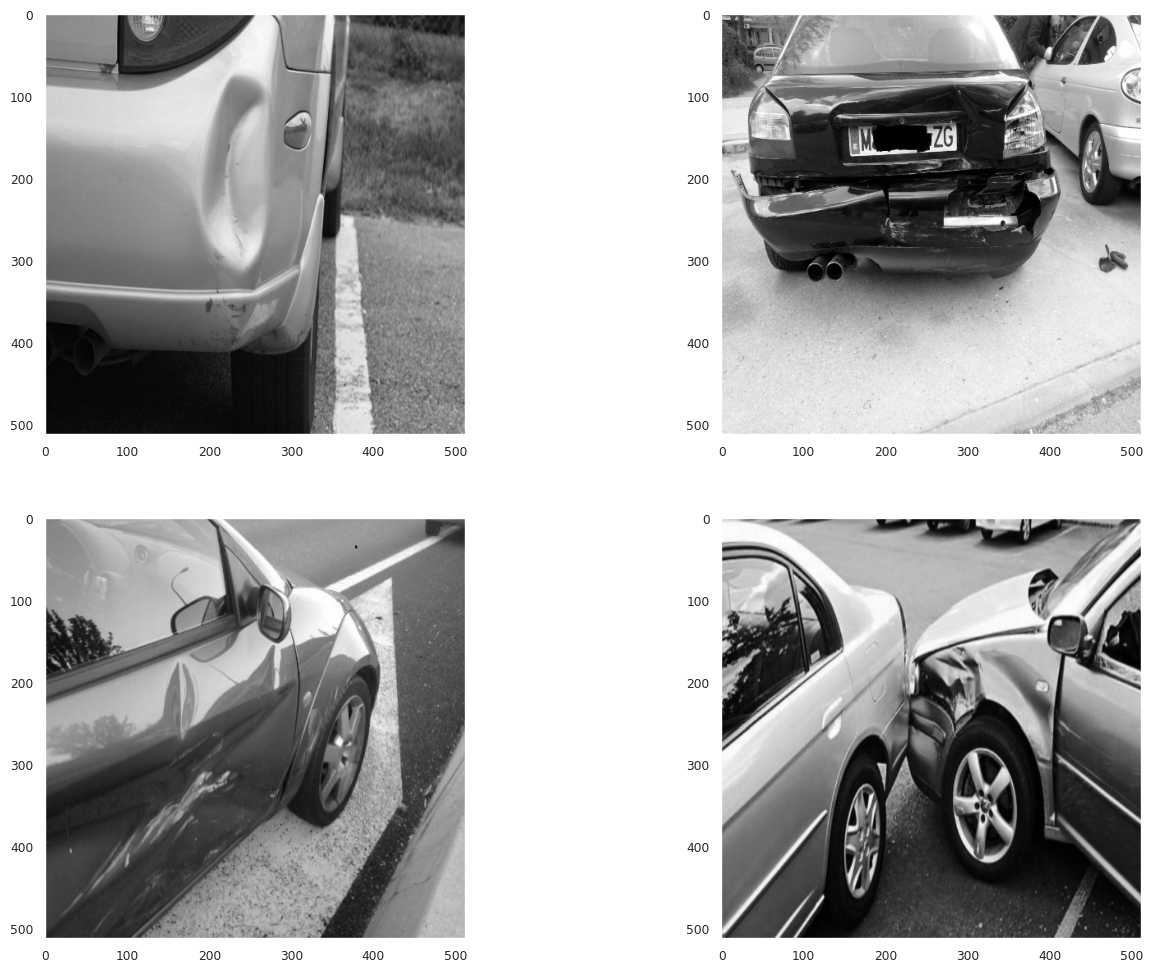

In [115]:
fig, ax = plt.subplots(2, 2, figsize =(16,12))
indices=[ax[0][0],ax[1][0],ax[0][1],ax[1][1] ]
i=-1
for d in random.sample(val_dataset_dicts, 4):
    i=i+1
    im = io.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=val_metadata_dicts,
                   scale=0.5,
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels. This option is only available for segmentation models
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    indices[i].grid(False)
    indices[i].imshow(out.get_image()[:, :, ::-1])

### Conclusion
* I think the results are quite fine even when the training data was around 60 images.
* Data augmentation can significantly improve the results.
* I will try doing multiclass object detection next.

### Do give this notebook an upvote if you liked my work, thanks!

In [98]:
# prompt: code to save the trained model

# Assuming 'trainer' is your trained model object and 'cfg' is your configuration
torch.save(trainer.model.state_dict(), os.path.join(cfg.OUTPUT_DIR, 'reerre1r.pth'))


In [116]:
# prompt: save the trainer as .h5 format in this path /content/drive/MyDrive/cardamge

import os

# Assuming 'trainer' is your trained model object and 'cfg' is your configuration
output_path = os.path.join('/content/drive/MyDrive/cardamge', 'faster_rcnn_X_101.h5')
torch.save(trainer.model.state_dict(), output_path)


# *test the dataset**

In [ ]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# Load the trained model and map it to the CPU
model = torch.load('/content/drive/MyDrive/cardamge/my_trained_modeel.pth', map_location=torch.device('cpu'))
model.eval()  # Set the model to evaluation mode

<ipython-input-5-10cb680ea1f6>:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load('/content/drive/MyDrive/cardamge/my_trained_modeel.pth', map_location=torc

AttributeError: 'collections.OrderedDict' object has no attribute 'eval'

In [ ]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# Assuming your model class is called 'MyModel'
# (replace 'MyModel' with the actual name of your model class)
from your_model_file import MyModel

# 1. Instantiate your model class
model = MyModel()  # Replace 'MyModel' with your actual model class

# 2. Load the state dictionary into your model instance
state_dict = torch.load('/content/drive/MyDrive/cardamge/my_trained_modeel.pth', map_location=torch.device('cpu'))
model.load_state_dict(state_dict)

# 3. Now you can set the model to evaluation mode
model.eval()